In [1]:
# import python libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#load dataset
credit_card=pd.read_excel("C:/Users/Aspire/Desktop/UTAR/Y3S1/FYP1/FYP1/default_of_credit_card_clients.xls")

In [3]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [4]:
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [5]:
credit_card.rename(columns={'default payment next month':'default'}, inplace=True)

In [6]:
credit_card.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

In [7]:
#Check the empty columns
credit_card.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [8]:
credit_card.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [9]:
#SEX
credit_card['SEX']=credit_card['SEX'].replace({1:'Male',2:'Female'},regex=True)

#EDUCATION
credit_card['EDUCATION']=credit_card['EDUCATION'].replace({1:'graduate school',2:'university',3:'high school', 0:'others', 4:'others', 5:'others', 6:'others'},regex=True)

#MARRIAGE
credit_card['MARRIAGE']=credit_card['MARRIAGE'].replace({1:'married',2:'single',0:'others', 3:'others'},regex=True)

#PAY_0
credit_card['PAY_0']=credit_card['PAY_0'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})

credit_card['PAY_2']=credit_card['PAY_2'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})

credit_card['PAY_3']=credit_card['PAY_3'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})

credit_card['PAY_4']=credit_card['PAY_4'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})

credit_card['PAY_5']=credit_card['PAY_5'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})

credit_card['PAY_6']=credit_card['PAY_6'].replace({-2:'neg2',-1:'duly',0:'zero',1:'one',2:'two',3:'three',4:'four',5:'five',6:'six',7:'seven',8:'eight'})


In [10]:
credit_card.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,Female,university,married,24,two,two,duly,duly,neg2,...,0,0,0,0,689,0,0,0,0,1
1,120000,Female,university,single,26,duly,two,zero,zero,zero,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,university,single,34,zero,zero,zero,zero,zero,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,university,married,37,zero,zero,zero,zero,zero,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,university,married,57,duly,zero,duly,zero,zero,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,Male,graduate school,single,37,zero,zero,zero,zero,zero,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,Male,graduate school,single,29,zero,zero,zero,zero,zero,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,Female,university,single,23,zero,duly,duly,zero,zero,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,Female,high school,married,28,zero,zero,two,zero,zero,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,Male,high school,single,35,neg2,neg2,neg2,neg2,duly,...,0,13007,13912,0,0,0,13007,1122,0,0


In [11]:
# Check and view all features 
categorical =[ i for i in credit_card.columns if credit_card[i].dtypes=='O']
for feature in categorical:
    print(credit_card[feature].value_counts())
    print("\n\n")

Female    18112
Male      11888
Name: SEX, dtype: int64



university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64



single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64



zero     14737
duly      5686
one       3688
neg2      2759
two       2667
three      322
four        76
five        26
eight       19
six         11
seven        9
Name: PAY_0, dtype: int64



zero     15730
duly      6050
two       3927
neg2      3782
three      326
four        99
one         28
five        25
seven       20
six         12
eight        1
Name: PAY_2, dtype: int64



zero     15764
duly      5938
neg2      4085
two       3819
three      240
four        76
seven       27
six         23
five        21
one          4
eight        3
Name: PAY_3, dtype: int64



zero     16455
duly      5687
neg2      4348
two       3159
three      180
four        69
seven       58
five        35
six          5
eight   

In [12]:
# Split the data set into the input matrix and output vector
X=credit_card.drop('default',axis=1)
y=credit_card['default']

In [13]:
print('Shape of original dataset,train:',credit_card.shape)
print('X: shape=',X.shape,'type=',type(X))
print('y: shape=',y.shape,'type=',type(y))

Shape of original dataset,train: (30000, 24)
X: shape= (30000, 23) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (30000,) type= <class 'pandas.core.series.Series'>


In [14]:
# Split the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X, y, test_size=0.2, random_state=30)
print('full set shape=', X.shape)
print('train shape=', X_train.shape)
print('test shape=', X_test.shape)

full set shape= (30000, 23)
train shape= (24000, 23)
test shape= (6000, 23)


In [15]:
# split the input matrix into numerical and categorical attributes
X_train_num =X_train.drop(['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)
X_train_cat =X_train[['SEX', 'EDUCATION', 'MARRIAGE','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
print('X_train_num shape:', X_train_num.shape)
print('X_train_cat shape:', X_train_cat.shape)

X_train_num shape: (24000, 14)
X_train_cat shape: (24000, 9)


In [16]:
# double check for missing column
print('Number of missing values for all columns:')
X_train_num.isnull().sum()

Number of missing values for all columns:


LIMIT_BAL    0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [17]:
print('Number of missing values for all columns:')
X_train_cat.isnull().sum()

Number of missing values for all columns:


SEX          0
EDUCATION    0
MARRIAGE     0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
dtype: int64

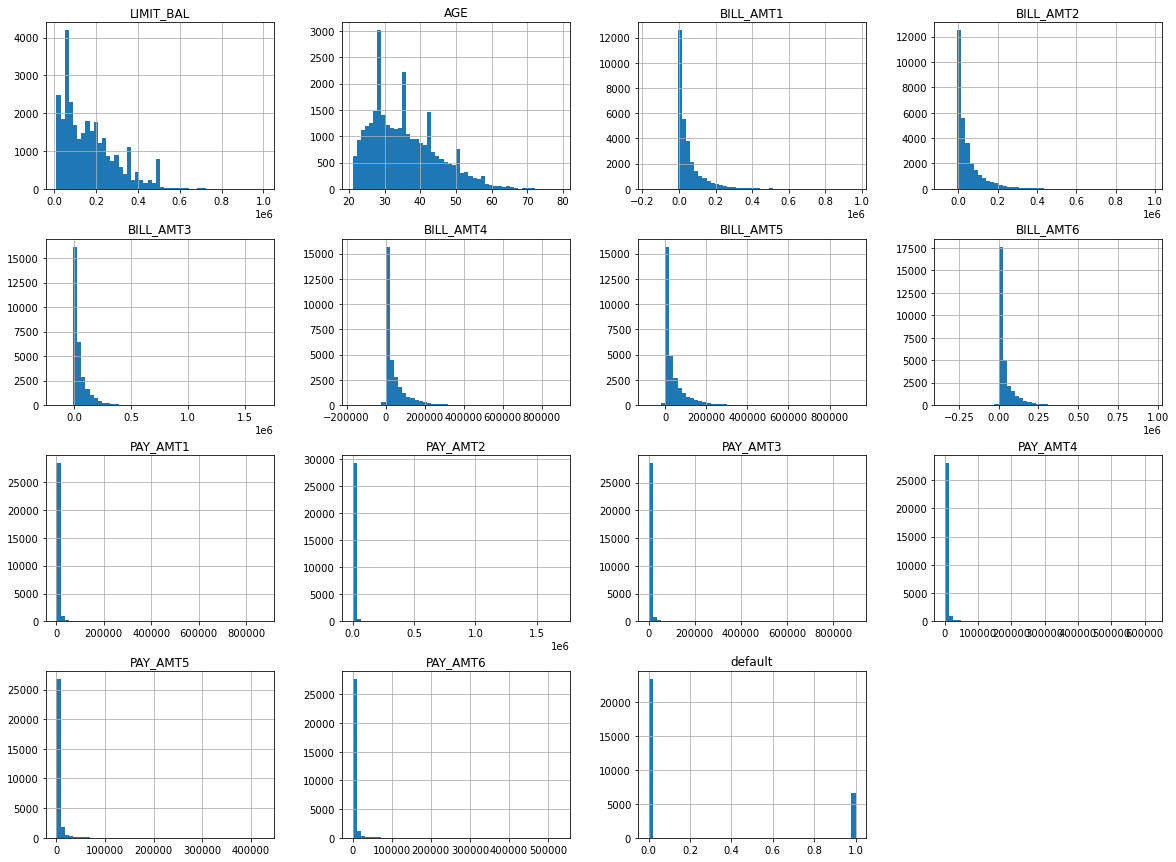

In [18]:
#HISTOGRAM
credit_card.hist(bins=50, figsize=(20, 15))
plt.show()

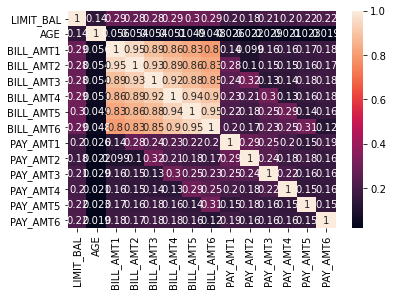

In [19]:
num_features=list(X_train_num)
corr_matrix = credit_card[num_features].corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='EDUCATION', ylabel='default'>

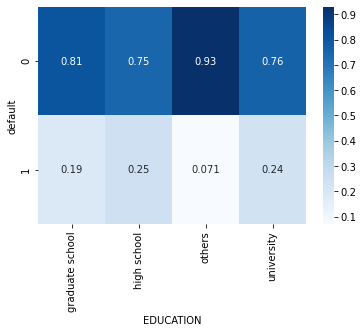

In [20]:
#create contingency table
cont_tbl=pd.crosstab(index=credit_card['default'], columns=credit_card['EDUCATION'], normalize='columns')
sn.heatmap(cont_tbl, annot=True, cmap='Blues')


In [21]:
credit_card1=credit_card.copy()

In [22]:
#categorical feature encoding
credit_card1 = pd.get_dummies(credit_card1, columns=["SEX"])
credit_card1 = pd.get_dummies(credit_card1, columns=["EDUCATION"])
credit_card1 = pd.get_dummies(credit_card1, columns=["MARRIAGE"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_0"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_2"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_3"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_4"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_5"])
credit_card1 = pd.get_dummies(credit_card1, columns=["PAY_6"])

In [23]:
credit_card1

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_duly,PAY_6_eight,PAY_6_five,PAY_6_four,PAY_6_neg2,PAY_6_seven,PAY_6_six,PAY_6_three,PAY_6_two,PAY_6_zero
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,1,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,0,0,0,0,0,1,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,0,0,0,0,0,0,1
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,0,0,0,0,0,0,1
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,...,0,0,0,0,0,0,0,0,0,1
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,...,0,0,0,0,0,0,0,0,0,1
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,0,0,0,0,0,0,0,0,0,1
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,...,1,0,0,0,0,0,0,0,0,0


In [24]:
credit_card1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 88 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   AGE                        30000 non-null  int64
 2   BILL_AMT1                  30000 non-null  int64
 3   BILL_AMT2                  30000 non-null  int64
 4   BILL_AMT3                  30000 non-null  int64
 5   BILL_AMT4                  30000 non-null  int64
 6   BILL_AMT5                  30000 non-null  int64
 7   BILL_AMT6                  30000 non-null  int64
 8   PAY_AMT1                   30000 non-null  int64
 9   PAY_AMT2                   30000 non-null  int64
 10  PAY_AMT3                   30000 non-null  int64
 11  PAY_AMT4                   30000 non-null  int64
 12  PAY_AMT5                   30000 non-null  int64
 13  PAY_AMT6                   30000 non-null  int64
 14  default               

In [25]:
#data normalisation
from sklearn import preprocessing as prep
minmax_scale = prep.MinMaxScaler().fit(credit_card1)
credit_minmax = minmax_scale.transform(credit_card1)
credit_minmax = pd.DataFrame(credit_minmax, columns = list(credit_card1))
credit_minmax

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_duly,PAY_6_eight,PAY_6_five,PAY_6_four,PAY_6_neg2,PAY_6_seven,PAY_6_six,PAY_6_three,PAY_6_two,PAY_6_zero
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29996,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29997,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29998,0.070707,0.344828,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X1 = credit_minmax.drop(["default"],axis=1)
y1 = credit_minmax["default"]

In [27]:
# Instantiate a SMOTE object
sm = SMOTE(random_state=42)

# Use SMOTE to resample the data
X_res, y_res = sm.fit_resample(X1, y1)

# Print the number of samples before and after SMOTE
print("Number of samples before SMOTE:", len(X))
print("Number of samples after SMOTE:", len(X_res))

Number of samples before SMOTE: 30000
Number of samples after SMOTE: 46726


In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_res, y_res, test_size=0.2, random_state=30)

In [29]:
print("X1_train: ", X1_train.shape) 
print("y1_train: ", y1_train.shape) 
print("X1_test: ", X1_test.shape) 
print("y1_test: ", y1_test.shape) 

X1_train:  (37380, 87)
y1_train:  (37380,)
X1_test:  (9346, 87)
y1_test:  (9346,)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt

C:\Users\Aspire\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7026535416220843
Precision: 0.7647895335608647
Recall: 0.5794009911656971
F1 Score: 0.6593110212087778
[[3878 1952]
 [ 827 2689]]
              precision    recall  f1-score   support

         0.0       0.82      0.67      0.74      5830
         1.0       0.58      0.76      0.66      3516

    accuracy                           0.70      9346
   macro avg       0.70      0.71      0.70      9346
weighted avg       0.73      0.70      0.71      9346



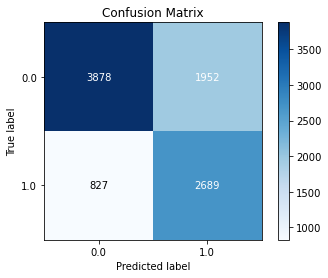

In [31]:
from sklearn.linear_model import LogisticRegression
accuracy={}
model = LogisticRegression()
model.fit(X1_train, y1_train)

test_pred = model.predict(X1_test)


# print(classification_report(train_pred, y1_train))
# print('\nAccuracy Score for model1(training): ', accuracy_score(train_pred, y1_train))
# print('f1 Score:' ,metrics.f1_score(train_pred, y1_train))
# skplt.metrics.plot_confusion_matrix(train_pred, y1_train)
# plt.show()
#skplt.metrics.plot_confusion_matrix((train_pred, y1_train),normalize=True)
#plt.show()

# Evaluate the model
accuracy = accuracy_score(y1_test, test_pred)
precision = precision_score(y1_test, test_pred)
recall = recall_score(y1_test, test_pred)
f1 = f1_score(y1_test, test_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

print(cm(test_pred, y1_test))
print(classification_report(test_pred, y1_test))
skplt.metrics.plot_confusion_matrix(test_pred, y1_test)
plt.show()
#skplt.metrics.plot_confusion_matrix((test_pred, y1_test),normalize=True)
#plt.show()

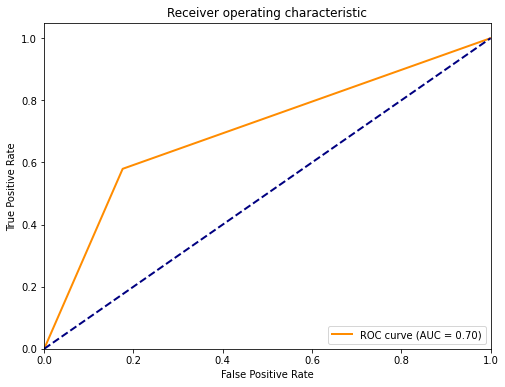

In [32]:
# Suppose you have actual y_test values and predicted probabilities y_pred_proba
fpr, tpr, thresholds = roc_curve(y1_test, test_pred)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Get feature importance scores
importances = abs(model.coef_[0])
print(importances)

[2.45429284 0.04746512 0.81672876 1.56391204 0.57128733 0.20183275
 0.14417384 0.29612872 4.27414127 2.4397655  2.66339508 2.34405513
 3.62241815 2.17545743 0.00430002 0.15179742 0.33993204 0.27487691
 0.84298527 0.37567371 0.21762463 0.09030541 0.02017818 0.54735333
 0.28165682 0.21308058 0.56382284 1.1491651  0.26786446 0.15836929
 0.16462867 0.76136191 1.12500231 1.15604212 0.16063436 0.25727973
 0.58571141 0.44089339 0.23350354 0.77261737 0.54675018 0.07558256
 0.26055377 0.145548   0.06872722 0.06213475 0.25312195 0.2237711
 0.19910704 0.04827539 0.16368123 0.14620353 0.30419512 0.15303544
 0.38687465 0.0723247  0.0471224  0.31762117 0.73025527 0.18845053
 0.20396556 0.51173856 0.27678984 0.69014794 0.19774892 0.4381944
 0.02151157 0.1764256  0.04344926 0.25513    0.30181764 0.18680374
 0.21230057 0.15780965 0.07443638 0.18555462 0.11613609 0.11227151
 0.18171984 0.06368406 0.05258832 0.08205034 0.01261487 0.30689111
 0.41465939 0.0566264  0.40116717]
